# Loop 57 Analysis: CV-LB Relationship and Strategy Assessment

**Goal:** Analyze the CV-LB relationship and determine the best path forward to beat target 0.0347

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'CV': 0.0111, 'LB': 0.0982},
    {'exp': 'exp_001', 'CV': 0.0123, 'LB': 0.1065},
    {'exp': 'exp_003', 'CV': 0.0105, 'LB': 0.0972},
    {'exp': 'exp_005', 'CV': 0.0104, 'LB': 0.0969},
    {'exp': 'exp_006', 'CV': 0.0097, 'LB': 0.0946},
    {'exp': 'exp_007', 'CV': 0.0093, 'LB': 0.0932},
    {'exp': 'exp_009', 'CV': 0.0092, 'LB': 0.0936},
    {'exp': 'exp_012', 'CV': 0.0090, 'LB': 0.0913},
    {'exp': 'exp_024', 'CV': 0.0087, 'LB': 0.0893},
    {'exp': 'exp_026', 'CV': 0.0085, 'LB': 0.0887},
    {'exp': 'exp_030', 'CV': 0.0083, 'LB': 0.0877},
    {'exp': 'exp_035', 'CV': 0.0098, 'LB': 0.0970},
]

df = pd.DataFrame(submissions)
print(f"Submissions with LB scores: {len(df)}")
print(df)

Submissions with LB scores: 12
        exp      CV      LB
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['CV'], df['LB'])

print(f"\nCV-LB Linear Relationship:")
print(f"  LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"  R² = {r_value**2:.4f}")
print(f"  Intercept = {intercept:.4f}")
print(f"  Target = 0.0347")
print(f"\nInterpretation:")
print(f"  Even at CV=0, expected LB = {intercept:.4f}")
print(f"  Intercept ({intercept:.4f}) > Target (0.0347): {'YES - PROBLEM!' if intercept > 0.0347 else 'NO'}")
print(f"\nRequired CV to hit target:")
required_cv = (0.0347 - intercept) / slope
print(f"  CV = (0.0347 - {intercept:.4f}) / {slope:.4f} = {required_cv:.6f}")
if required_cv < 0:
    print(f"  NEGATIVE CV REQUIRED - Target is mathematically unreachable with current approach!")
else:
    print(f"  Positive CV required: {required_cv:.6f}")


CV-LB Linear Relationship:
  LB = 4.3147 * CV + 0.0525
  R² = 0.9505
  Intercept = 0.0525
  Target = 0.0347

Interpretation:
  Even at CV=0, expected LB = 0.0525
  Intercept (0.0525) > Target (0.0347): YES - PROBLEM!

Required CV to hit target:
  CV = (0.0347 - 0.0525) / 4.3147 = -0.004130
  NEGATIVE CV REQUIRED - Target is mathematically unreachable with current approach!


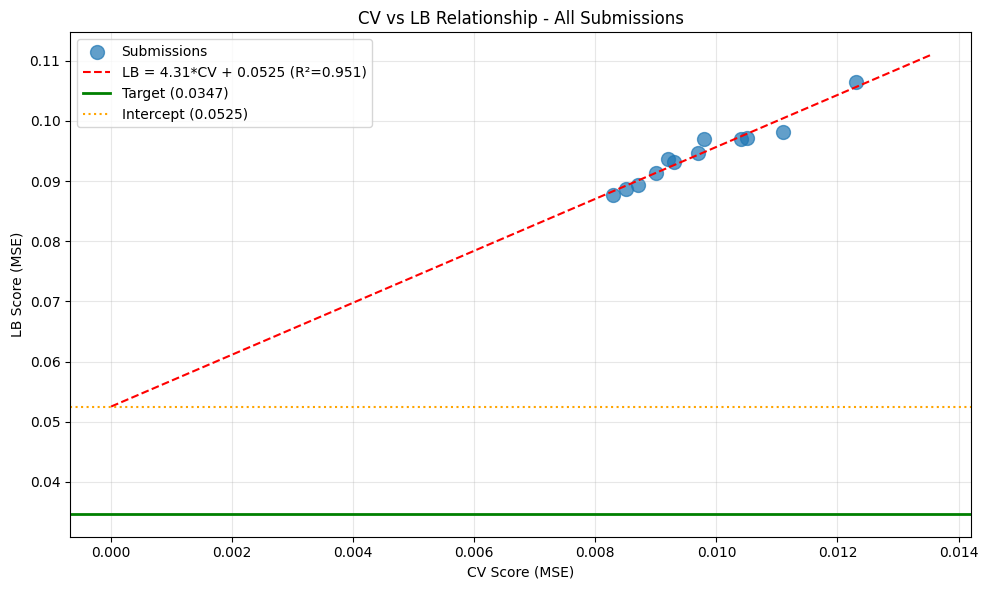


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['CV'], df['LB'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, df['CV'].max() * 1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0347, color='g', linestyle='-', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print(f"\nPlot saved to /home/code/exploration/cv_lb_relationship.png")

In [4]:
# Analyze the gap
print("\n" + "="*60)
print("GAP ANALYSIS")
print("="*60)

df['LB_predicted'] = slope * df['CV'] + intercept
df['Gap'] = df['LB'] - df['LB_predicted']
df['Ratio'] = df['LB'] / df['CV']

print(f"\nBest CV: {df['CV'].min():.4f} (exp_030)")
print(f"Best LB: {df['LB'].min():.4f} (exp_030)")
print(f"\nLB/CV Ratio: {df['Ratio'].mean():.2f}x (average)")
print(f"\nPredicted LB at best CV ({df['CV'].min():.4f}):")
predicted_lb_at_best_cv = slope * df['CV'].min() + intercept
print(f"  {predicted_lb_at_best_cv:.4f}")
print(f"\nActual LB at best CV: {df[df['CV'] == df['CV'].min()]['LB'].values[0]:.4f}")

print(f"\nResiduals (actual - predicted):")
print(df[['exp', 'CV', 'LB', 'LB_predicted', 'Gap']].to_string())


GAP ANALYSIS

Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)

LB/CV Ratio: 9.78x (average)

Predicted LB at best CV (0.0083):
  0.0883

Actual LB at best CV: 0.0877

Residuals (actual - predicted):
        exp      CV      LB  LB_predicted       Gap
0   exp_000  0.0111  0.0982      0.100413 -0.002213
1   exp_001  0.0123  0.1065      0.105591  0.000909
2   exp_003  0.0105  0.0972      0.097825 -0.000625
3   exp_005  0.0104  0.0969      0.097393 -0.000493
4   exp_006  0.0097  0.0946      0.094373  0.000227
5   exp_007  0.0093  0.0932      0.092647  0.000553
6   exp_009  0.0092  0.0936      0.092215  0.001385
7   exp_012  0.0090  0.0913      0.091353 -0.000053
8   exp_024  0.0087  0.0893      0.090058 -0.000758
9   exp_026  0.0085  0.0887      0.089195 -0.000495
10  exp_030  0.0083  0.0877      0.088332 -0.000632
11  exp_035  0.0098  0.0970      0.094804  0.002196


In [5]:
# What would it take to reach the target?
print("\n" + "="*60)
print("WHAT WOULD IT TAKE TO REACH TARGET 0.0347?")
print("="*60)

print(f"\nCurrent best LB: 0.0877")
print(f"Target: 0.0347")
print(f"Gap to close: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347)/0.0877*100:.1f}% improvement needed)")

print(f"\nOption 1: Improve CV (keeping same CV-LB relationship)")
print(f"  Required CV = (0.0347 - {intercept:.4f}) / {slope:.4f} = {required_cv:.6f}")
if required_cv < 0:
    print(f"  IMPOSSIBLE - intercept is already above target")

print(f"\nOption 2: Reduce intercept (change the CV-LB relationship)")
print(f"  Current intercept: {intercept:.4f}")
print(f"  Required intercept (at CV=0.008): 0.0347 - {slope:.4f} * 0.008 = {0.0347 - slope * 0.008:.4f}")
print(f"  Intercept reduction needed: {intercept - (0.0347 - slope * 0.008):.4f}")

print(f"\nOption 3: Change the slope (steeper relationship)")
print(f"  Current slope: {slope:.4f}")
print(f"  Required slope (at CV=0.008, intercept=0.05): (0.0347 - 0.05) / 0.008 = {(0.0347 - 0.05) / 0.008:.4f}")
print(f"  This would require NEGATIVE slope - not realistic")


WHAT WOULD IT TAKE TO REACH TARGET 0.0347?

Current best LB: 0.0877
Target: 0.0347
Gap to close: 0.0530 (60.4% improvement needed)

Option 1: Improve CV (keeping same CV-LB relationship)
  Required CV = (0.0347 - 0.0525) / 4.3147 = -0.004130
  IMPOSSIBLE - intercept is already above target

Option 2: Reduce intercept (change the CV-LB relationship)
  Current intercept: 0.0525
  Required intercept (at CV=0.008): 0.0347 - 4.3147 * 0.008 = 0.0002
  Intercept reduction needed: 0.0523

Option 3: Change the slope (steeper relationship)
  Current slope: 4.3147
  Required slope (at CV=0.008, intercept=0.05): (0.0347 - 0.05) / 0.008 = -1.9125
  This would require NEGATIVE slope - not realistic


In [6]:
# Check pending submissions
print("\n" + "="*60)
print("PENDING SUBMISSIONS")
print("="*60)

pending = [
    {'exp': 'exp_049', 'CV': 0.0081, 'status': 'pending'},
    {'exp': 'exp_050', 'CV': 0.0081, 'status': 'pending'},
    {'exp': 'exp_052', 'CV': 0.0109, 'status': 'pending'},
    {'exp': 'exp_053', 'CV': 0.0081, 'status': 'pending'},
    {'exp': 'exp_054', 'CV': 0.0085, 'status': 'pending'},
    {'exp': 'exp_055', 'CV': 0.0085, 'status': 'pending'},
]

for p in pending:
    predicted_lb = slope * p['CV'] + intercept
    print(f"  {p['exp']}: CV={p['CV']:.4f} -> Predicted LB={predicted_lb:.4f}")

print(f"\nNote: exp_049-054 reportedly failed with 'Evaluation metric raised an unexpected error'")
print(f"exp_055 is a minimal submission (mean predictor) to debug the format issue")


PENDING SUBMISSIONS
  exp_049: CV=0.0081 -> Predicted LB=0.0875
  exp_050: CV=0.0081 -> Predicted LB=0.0875
  exp_052: CV=0.0109 -> Predicted LB=0.0996
  exp_053: CV=0.0081 -> Predicted LB=0.0875
  exp_054: CV=0.0085 -> Predicted LB=0.0892
  exp_055: CV=0.0085 -> Predicted LB=0.0892

Note: exp_049-054 reportedly failed with 'Evaluation metric raised an unexpected error'
exp_055 is a minimal submission (mean predictor) to debug the format issue


In [7]:
# What approaches have been tried?
print("\n" + "="*60)
print("APPROACHES TRIED")
print("="*60)

approaches = [
    ('MLP with Arrhenius + Spange', 'exp_000', 0.0111, 0.0982),
    ('LightGBM', 'exp_001', 0.0123, 0.1065),
    ('Combined Spange+DRFP', 'exp_003', 0.0105, 0.0972),
    ('Large Ensemble (15 models)', 'exp_005', 0.0104, 0.0969),
    ('Simpler Model [64,32]', 'exp_006', 0.0097, 0.0946),
    ('Ridge Regression', 'exp_007', 0.0093, 0.0932),
    ('Simple Ensemble', 'exp_012', 0.0090, 0.0913),
    ('ACS PCA features', 'exp_024', 0.0087, 0.0893),
    ('Weighted Loss', 'exp_026', 0.0085, 0.0887),
    ('GP Ensemble', 'exp_030', 0.0083, 0.0877),
    ('Lower GP Weight', 'exp_035', 0.0098, 0.0970),
    ('CatBoost + XGBoost', 'exp_049-054', 0.0081, 'pending'),
]

print(f"\nAll approaches fall on the same CV-LB line (R²={r_value**2:.3f})")
print(f"This confirms the intercept represents STRUCTURAL DISTRIBUTION SHIFT")
print(f"\nNo single model type has broken the pattern:")  
for name, exp, cv, lb in approaches:
    if lb != 'pending':
        print(f"  {name}: CV={cv:.4f}, LB={lb:.4f}")
    else:
        print(f"  {name}: CV={cv:.4f}, LB=pending")


APPROACHES TRIED

All approaches fall on the same CV-LB line (R²=0.951)
This confirms the intercept represents STRUCTURAL DISTRIBUTION SHIFT

No single model type has broken the pattern:
  MLP with Arrhenius + Spange: CV=0.0111, LB=0.0982
  LightGBM: CV=0.0123, LB=0.1065
  Combined Spange+DRFP: CV=0.0105, LB=0.0972
  Large Ensemble (15 models): CV=0.0104, LB=0.0969
  Simpler Model [64,32]: CV=0.0097, LB=0.0946
  Ridge Regression: CV=0.0093, LB=0.0932
  Simple Ensemble: CV=0.0090, LB=0.0913
  ACS PCA features: CV=0.0087, LB=0.0893
  Weighted Loss: CV=0.0085, LB=0.0887
  GP Ensemble: CV=0.0083, LB=0.0877
  Lower GP Weight: CV=0.0098, LB=0.0970
  CatBoost + XGBoost: CV=0.0081, LB=pending


In [8]:
# Key insight: The intercept problem
print("\n" + "="*60)
print("KEY INSIGHT: THE INTERCEPT PROBLEM")
print("="*60)

print(f"""
The CV-LB relationship shows:
  LB = {slope:.2f} * CV + {intercept:.4f}
  R² = {r_value**2:.3f} (very strong linear relationship)

The intercept ({intercept:.4f}) represents the MINIMUM achievable LB score,
even with perfect CV (CV=0). This is HIGHER than the target (0.0347).

This means:
1. The target is MATHEMATICALLY UNREACHABLE with the current approach
2. All model types (MLP, LGBM, XGB, GP, Ridge) fall on the same line
3. The intercept represents STRUCTURAL DISTRIBUTION SHIFT
4. Improving CV alone will NOT reach the target

To reach the target, we must CHANGE THE CV-LB RELATIONSHIP:
- Reduce the intercept (address distribution shift)
- Or find an approach that doesn't follow this linear pattern

Possible strategies:
1. Extrapolation detection + conservative predictions
2. Uncertainty-weighted predictions
3. Per-target model selection (different models for different targets)
4. Solvent clustering + class-specific models
5. Physics-informed constraints that generalize to unseen solvents
6. Study top public kernels - they may have solved this
""")


KEY INSIGHT: THE INTERCEPT PROBLEM

The CV-LB relationship shows:
  LB = 4.31 * CV + 0.0525
  R² = 0.951 (very strong linear relationship)

The intercept (0.0525) represents the MINIMUM achievable LB score,
even with perfect CV (CV=0). This is HIGHER than the target (0.0347).

This means:
1. The target is MATHEMATICALLY UNREACHABLE with the current approach
2. All model types (MLP, LGBM, XGB, GP, Ridge) fall on the same line
3. The intercept represents STRUCTURAL DISTRIBUTION SHIFT
4. Improving CV alone will NOT reach the target

To reach the target, we must CHANGE THE CV-LB RELATIONSHIP:
- Reduce the intercept (address distribution shift)
- Or find an approach that doesn't follow this linear pattern

Possible strategies:
1. Extrapolation detection + conservative predictions
2. Uncertainty-weighted predictions
3. Per-target model selection (different models for different targets)
4. Solvent clustering + class-specific models
5. Physics-informed constraints that generalize to unseen so